<a href="https://colab.research.google.com/github/robinofautumn/Local-codes-c-cpp/blob/main/Shivam_Singh_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_id = '1Qr6cOrZkPif8q9s0SNTZVUCZ5GHy1d3G'
link = f'https://drive.google.com/uc?id={file_id}'

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV Data
 # Replace with the actual file path
data = pd.read_csv(link)

# Step 2: Select Relevant Attributes for Clustering
attributes_to_exclude = ['id', 'diagnosis']
attributes_for_clustering = [col for col in data.columns if col not in attributes_to_exclude]

data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
new_data = data.drop(columns='Unnamed: 32')
new_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
new_data = data[attributes_for_clustering].copy()

In [36]:
new_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [37]:
# 1. scaling the data-->no one column dominates the data
# 2. initialize random centroids
# 3. label eaach data point
# 4. update centroids
# 5. repeat steps 3 and 4 until centroids stop changing
new_data = ((new_data-new_data.min())/(new_data.max()-new_data.min()))*9+1 #scaling every row from 1 to 10.... min value will become 1 and max value will become 10

In [38]:
new_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,4.043998,3.915686,3.996416,2.952281,4.553061,3.345405,2.872525,3.188232,4.416448,3.433414,...,4.275986,3.548239,2.538156,4.637241,2.981911,2.956626,4.544522,3.369762,2.706365,NaN
std,1.501086,1.309074,1.511235,1.343469,1.142702,1.457931,1.681064,1.735714,1.246104,1.338316,...,1.474316,1.506165,1.259392,1.357009,1.373838,1.499695,2.032959,1.097590,1.066191,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,3.010081,2.966182,2.951627,2.056713,3.741356,2.257162,1.623336,1.908499,3.540909,2.467144,...,3.173241,2.510533,1.730166,3.700059,2.047036,1.823083,3.008144,2.665878,1.969303,NaN
50%,3.721426,3.778830,3.640108,2.556055,4.513226,3.022115,2.297704,2.498509,4.327273,3.195029,...,4.211887,3.117884,2.108853,4.573730,2.611986,2.629633,4.090619,3.230041,2.475797,NaN
75%,4.747977,4.679743,4.750881,3.440212,5.279408,4.064781,3.756092,4.310139,5.077273,4.063184,...,5.245736,4.361273,2.988105,5.447401,3.722677,3.752476,5.991753,3.863394,3.186541,NaN
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN


In [39]:
#initialize the random centroids
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = new_data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [40]:
centroids = random_centroids(new_data, 2)
centroids

,0,1
radius_mean,3.252875,3.759761
texture_mean,4.582347,3.809266
perimeter_mean,4.349734,6.653998
area_mean,2.174295,1.519576
smoothness_mean,3.861605,5.222533
compactness_mean,4.031654,5.105515
concavity_mean,5.497891,1.842643
concave points_mean,2.281113,1.759990
symmetry_mean,7.522727,3.331818
fractal_dimension_mean,7.188922,3.011163


In [41]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
labels = get_labels(new_data, centroids)
labels

0      0
1      1
2      1
3      0
4      0
      ..
564    0
565    1
566    1
567    0
568    0
Length: 569, dtype: int64

In [42]:
labels.value_counts()# each cluster holds how many points

1    387
0    182
dtype: int64

In [43]:
#update the centroids
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #takes the geometric mean
new_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1
radius_mean,3.499154,3.929178
texture_mean,3.834010,3.634996
perimeter_mean,3.483501,3.859261
area_mean,2.556487,2.785161
smoothness_mean,4.664211,4.290999
compactness_mean,3.415176,2.916677
concavity_mean,2.724643,2.367285
concave points_mean,2.880099,2.742253
symmetry_mean,4.908691,3.962442
fractal_dimension_mean,4.023129,2.874726


In [44]:
from sklearn.decomposition import PCA # PCA to summarize the 31 columns in 2 dimensions so as to easily plot the graph
import matplotlib.pyplot as plt
from IPython.display import clear_output # clears the output screen each time we plot a new graph

In [45]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [52]:
new_data.info()
# centroids.info()
# labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

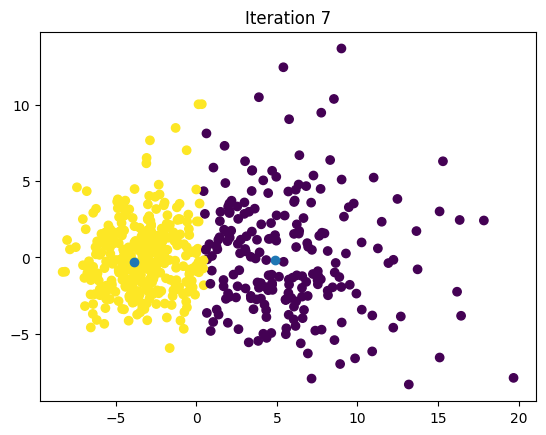

In [57]:
max_iterations = 100
centroid_count = 2

centroids = random_centroids(new_data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(new_data, centroids)
    centroids = new_centroids(new_data, labels, centroid_count)
    # new_data = new_data.drop(columns='Unnamed: 32')
    # new_data = data.dropna(subset=attributes_for_clustering)
    plot_clusters(new_data, labels, centroids, iteration)
    iteration += 1

In [69]:
output = np.bincount(labels)
print(f"cluster 1->{output[0]}")
print(f"cluster 2->{output[1]}")

cluster 1->211
cluster 2->358
